In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'

data = pd.read_excel('res/RES_(0_use30).xlsx')

In [4]:
# Eight algorithm results are compared in a dataframe and visualized in Excel
df = data.copy()
arr1 = df.iloc[:,0].to_numpy().reshape(5,3,7)
arr2 = df.iloc[:,-1].to_numpy().reshape(5,3,7)[:, :, [2]]
arr = np.concatenate((arr1, arr2), axis=2)
arr = pd.DataFrame(arr.reshape(-1,8).T)
arr.columns = ['MCAR_10%', 'MCAR_30%', 'MCAR_50%', 'MAR_10%', 'MAR_30%', 'MAR_50%', 'MNAR_10%', 'MNAR_30%', 'MNAR_50%', 'Seq_10%', 'Seq_30%', 'Seq_50%', 'Block_10%', 'Block_30%', 'Block_50%']
arr.index = ['MICE', 'KNNI', 'LOCF', 'GRUD', 'SSGAN', 'SAITS', 'iTransformer', 'VCAAN']
arr.to_excel('res/RES_compare.xlsx')

In [5]:
# line chart for different missing types and missing rates
df = data.copy()
arr = df.to_numpy().reshape(5,3,7,5)

missing_types = ['MCAR', 'MAR', 'MNAR', 'Seq', 'Block']
missing_rates = ['10%', '30%', '50%']
initial_algorithms = ['MICE', 'KNNI', 'LOCF', 'GRUD', 'SSGAN', 'SAITS', 'iTransformer']
model_versions = ['Original', 'CCA', 'VCA', 'CCAAN', 'VCAAN']

# colors for different missing types and markers for different initial algorithms
colors = ['#63C384', '#008AEF', '#FF555A', '#D6007B', '#FFB628']
markers = ['o', 's', 'D', '^', 'v', 'p', '*']

# create a directory to save figures if not exists
os.makedirs('res/figs', exist_ok=True)

for i, missing_type in enumerate(missing_types):
    for j, missing_rate in enumerate(missing_rates):
        fig, ax = plt.subplots(figsize=(8, 6))
        
        for k, initial_algorithm in enumerate(initial_algorithms):
            mse_values = arr[i, j, k, :]
            
            ax.plot(
                model_versions,  # x axis: model versions
                mse_values,  # y axis: MSE
                color=colors[i],  # color
                marker=markers[k],  # marker
                label=initial_algorithm  # label
            )
        
        ax.set_xticks(range(len(model_versions)))
        ax.set_xticklabels(model_versions, rotation=45, ha='right', fontsize=12)
        
        ax.grid(axis='y', linestyle='--', alpha=0.6)
            
        # add y-axis label for the first subplot
        if missing_rate == '10%':
            ax.set_ylabel('MSE', fontsize=12)
        # add legend for the last subplot
        if missing_rate == '50%':
            ax.legend(title=missing_type, fontsize=10, title_fontsize=12, loc='upper right')
        
        # save the figure
        filename = f'res/figs/linechart_{missing_type}_{missing_rate.replace("%", "")}.png'
        plt.savefig(filename, dpi=300)
        plt.close()

print("All figures have been saved successfully under the 'res/figs' directory.")

All figures have been saved successfully under the 'res/figs' directory.


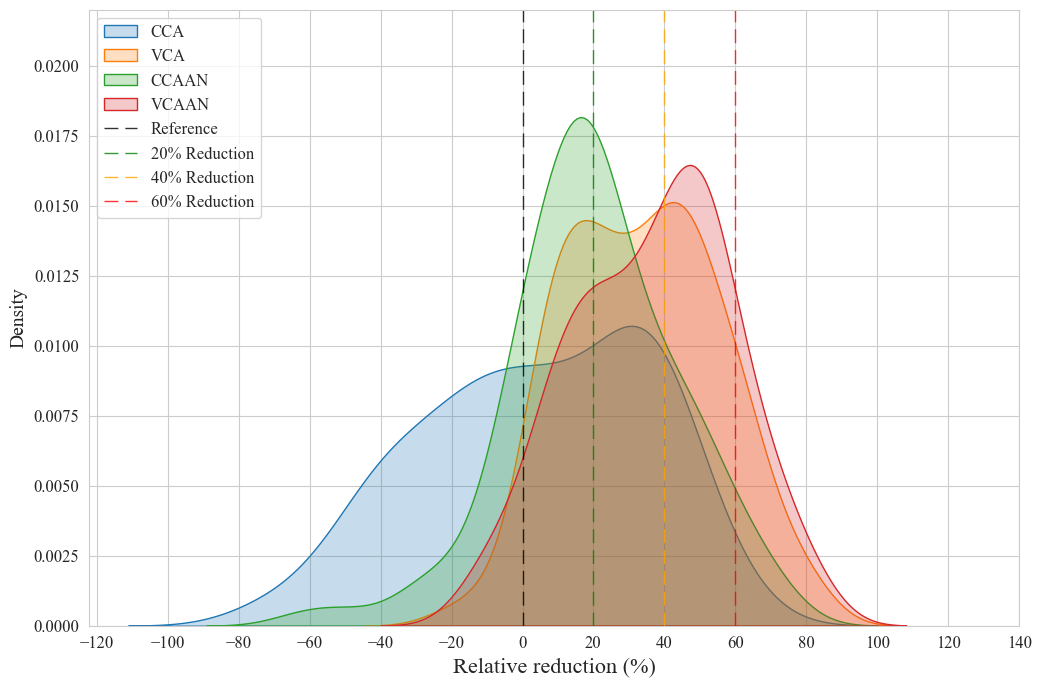

In [6]:
# kernel density estimation
df = data.copy()
df.columns = ['Baseline', 'CCA', 'VCA', 'CCAAN', 'VCAAN']
# calculate the relative reduction percentage
for col in df.columns[1:]:
    df[col] = (df['Baseline'] - df[col]) / df['Baseline'] * 100

plt.figure(figsize=(12, 8))
for col in df.columns[1:]:
    sns.kdeplot(df[col], label=col, fill=True)  # 使用 fill=True 替代 shade=True

plt.xlabel('Relative reduction (%)', fontsize=16)
plt.ylabel('Density', fontsize=14)

plt.xticks(np.arange(-120, 150, 20), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 0.022)

lines = [
    {'x': 0, 'color': 'black', 'label': 'Reference'},
    {'x': 20, 'color': 'green', 'label': '20% Reduction'},
    {'x': 40, 'color': 'orange', 'label': '40% Reduction'},
    {'x': 60, 'color': 'red', 'label': '60% Reduction'}
]

# add vertical lines
for line in lines:
    plt.axvline(
        x=line['x'], 
        color=line['color'], 
        alpha=.8, 
        linewidth=1, 
        linestyle=(0, (10, 5)),  # custom dash pattern
        label=line['label']
    )

plt.legend(fontsize=12, title_fontsize=14, loc='upper left')
plt.savefig('res/figs/kdechart.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# output results with latex table if needed
df = data.copy()

for col in df.columns[1:]:
    df[col] = (df['Baseline'] - df[col]) / df['Baseline'] * 100
df = df.describe().iloc[3:,1:]
df = df.map(lambda x: f'{x:.2f}%')
# latex表格，三线表
table = df.to_latex(index=True,  # 不显示行索引
    column_format='ccccc',  # 列格式：左对齐，三列居中
    position='htbp',  # 表格位置：here, top, bottom, page
    caption='Quartile of the percent improvement in imputation loss',  # 表格标题
    label='tab:Quartile_improve',  # 表格标签
    escape=True  # 转义特殊字符
    )
print(table)

\begin{table}[htbp]
\caption{Quartile of the percent improvement in imputation loss}
\label{tab:Quartile_improve}
\begin{tabular}{ccccc}
\toprule
 & CCA & VCA & CCAAN & VCAAN \\
\midrule
min & -73.18\% & -19.27\% & -61.14\% & -13.71\% \\
25\% & -18.45\% & 16.32\% & 4.82\% & 19.21\% \\
50\% & 7.54\% & 34.35\% & 17.94\% & 38.40\% \\
75\% & 31.89\% & 49.12\% & 33.36\% & 52.77\% \\
max & 62.14\% & 80.71\% & 71.77\% & 81.88\% \\
\bottomrule
\end{tabular}
\end{table}

